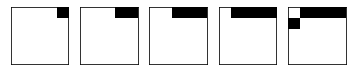

In [1]:
from numpy import zeros
from random import randint
from random import random
from matplotlib import pyplot

from numpy import array
from numpy import zeros

# generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    # define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    # choose the row index for the next step
    step = randint(lower, upper)
    # copy the prior frame
    frame = last_frame.copy()
    # add the new step
    frame[step, column] = 1
    return frame, step

# generate a sequence of frames of a dot moving across an image
def build_frames(size):
    frames = list()
    # create the first frame
    frame = zeros((size,size))
    step = randint(0, size-1)
    # decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    # create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

# generate sequence of frames
size = 5
frames, right = build_frames(size)
# plot all feames
pyplot.figure()
for i in range(size):
    # 8.2. Moving Square Video Prediction Problem 100
    # create a grayscale subplot for each frame
    pyplot.subplot(1, size, i+1)
    pyplot.imshow(frames[i], cmap= 'Greys' )
    # turn of the scale to make it cleaer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# show the plot
pyplot.show()


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed


# generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    # resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, size, size, size, 1)
     #8.8. Further Reading 105
    y = array(y).reshape(n_patterns, 1)
    return X, y



In [2]:

# configure problem
size = 50

# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2,2), activation= 'relu' ),
input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'acc' ])
print(model.summary())


# fit model
X, y = generate_examples(size, 5000)



model.fit(X, y, batch_size=32, epochs=1,verbose =1)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                240600    
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________
None
157/157 [==============================] - 111s 691ms/step - loss: 0.4489 - acc: 0.7684


In [4]:
# # evaluate model
X, y = generate_examples(size, 100)
loss, acc = model.evaluate(X, y, verbose=0)
print( 'loss: %f, acc: %f' % (loss, acc*100))


# # prediction on new data
X, y = generate_examples(size, 1)
yhat = model.predict_classes(X, verbose=0)
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left"
print( 'Expected: %s, Predicted: %s' % (expected, predicted))

loss: 0.008481, acc: 100.000000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Expected: Left, Predicted: Left
